Columns in dataset: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')
Using text column: Text


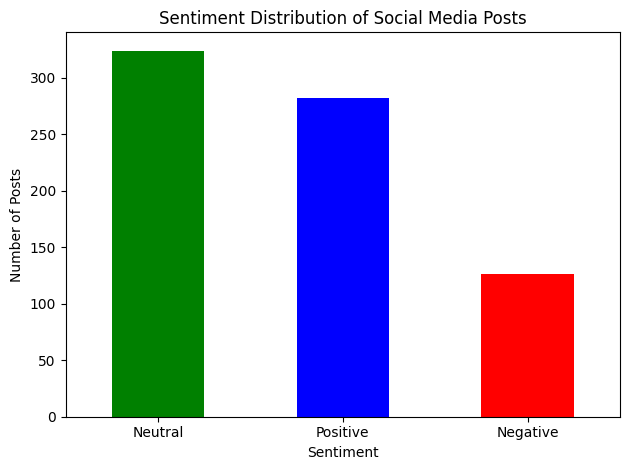

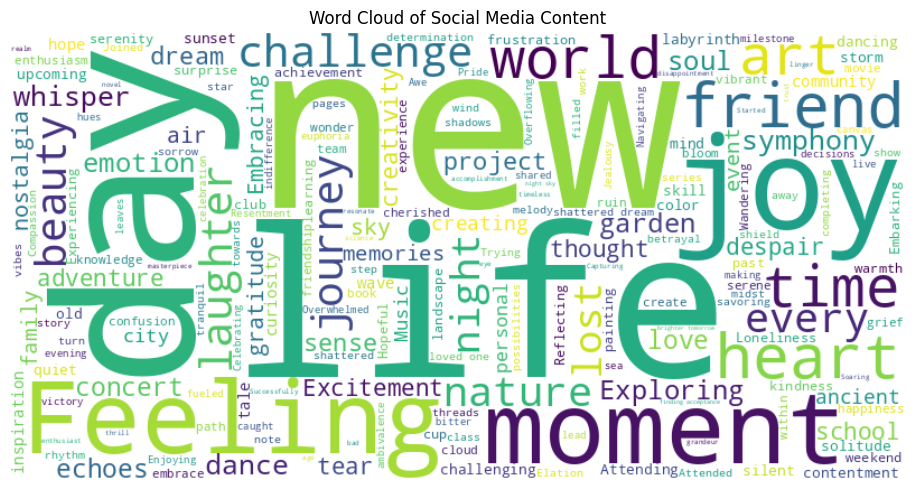

In [ ]:
# ✅ Task 1: Social Media Sentiment Analysis from sentimentdataset.csv

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Step 1: Load the dataset
df = pd.read_csv("sentimentdataset.csv")

# Step 2: Check the available columns
print("Columns in dataset:", df.columns)

# Step 3: Automatically detect the text column (or manually set it)
# You can uncomment and set manually if needed:
# text_column = 'text'

possible_columns = ['text', 'content', 'tweet', 'message']
text_column = next((col for col in df.columns if col.lower() in possible_columns), None)

if text_column is None:
    raise ValueError("No known text column found! Please check your CSV file and update the column name.")

print(f"Using text column: {text_column}")

# Step 4: Sentiment Analysis Function
def get_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Step 5: Apply Sentiment Analysis
df['Sentiment'] = df[text_column].apply(get_sentiment)

# Step 6: Sentiment Count Plot
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 7: Word Cloud
all_text = ' '.join(df[text_column].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Social Media Content")
plt.tight_layout()
plt.show()
